## Mount Drive, Load Data from CSV File & Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/BRACU/Semesters/Sem 07 (Fall23)/CSE422/Labs/cse422-lab-project/dataset/Telco-Customer-Churn - Telco-Customer-Churn.csv")
data.head(10)

,customerID,gender,SeniorCitizen,Partner,HaveDog,Dependents,tenure,WatchNetflix,PhoneService,MultipleLines,...,TechSupport,FeelsLonely,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,NaN,No,1.0,NaN,No,No phone service,...,No,NaN,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,NaN,No,34.0,NaN,Yes,No,...,No,NaN,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,NaN,No,2.0,NaN,Yes,No,...,No,NaN,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,NaN,No,45.0,NaN,No,No phone service,...,Yes,NaN,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,NaN,No,2.0,NaN,Yes,No,...,No,NaN,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,NaN,No,8.0,NaN,Yes,Yes,...,No,NaN,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,NaN,Yes,22.0,NaN,Yes,Yes,...,No,NaN,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,NaN,No,10.0,NaN,No,No phone service,...,No,NaN,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,NaN,No,28.0,NaN,Yes,Yes,...,Yes,NaN,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,NaN,Yes,62.0,NaN,Yes,No,...,No,NaN,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Dataset Analyse & Preprosessing & Feature Selection





In [ ]:
data.shape

(7043, 25)

In [ ]:
data.isnull().sum()

customerID             1
gender                 5
SeniorCitizen          0
Partner                3
HaveDog             7043
Dependents             1
tenure                 5
WatchNetflix        7043
PhoneService           0
MultipleLines          6
InternetService        4
OnlineSecurity         6
UseTiktok           7043
OnlineBackup           5
DeviceProtection       4
TechSupport            8
FeelsLonely         7043
StreamingTV           10
StreamingMovies        6
Contract               3
PaperlessBilling       2
PaymentMethod          6
MonthlyCharges         6
TotalCharges          18
Churn                  0
dtype: int64

### Dropping unnecessary columns or features
So we can see, we have:
- 7043 individual entries or rows with 25 coulumns.
- The first 24 columns are our features and the last column `Churn` is our class.
- Here the `customerID` feature doesn't seem to contribute anything as all the customers have unique IDs, so we will not find any pattern here. As a result it's better to drop the column `customerID`
- Then the columns `HaveDog`, `WatchNetflix`, `UseTiktok`, `FeelsLonely` doesn't seem to have any values in it, all the entries of these columns are null. So it's better to drop these columns as well.

In [ ]:
print("Shape of dataframe before dropping any features:", data.shape)
data = data.drop(['customerID', 'HaveDog', 'WatchNetflix', 'UseTiktok', 'FeelsLonely'], axis = 1)
print("Shape of dataframe after dropping unnecessary features:", data.shape)
data.isnull().sum()

Shape of dataframe before dropping any features: (7043, 25)
Shape of dataframe after dropping unnecessary features: (7043, 20)


gender               5
SeniorCitizen        0
Partner              3
Dependents           1
tenure               5
PhoneService         0
MultipleLines        6
InternetService      4
OnlineSecurity       6
OnlineBackup         5
DeviceProtection     4
TechSupport          8
StreamingTV         10
StreamingMovies      6
Contract             3
PaperlessBilling     2
PaymentMethod        6
MonthlyCharges       6
TotalCharges        18
Churn                0
dtype: int64

### Dropping Entries with Duplicate Values

In [ ]:
data.duplicated().sum()

21

In [ ]:
print("Shape of dataframe before dropping duplicate entries", data.shape)
data.drop_duplicates(inplace=True)
print("Shape of dataframe after dropping duplicate entries", data.shape)

Shape of dataframe before dropping duplicate entries (7043, 20)
Shape of dataframe after dropping duplicate entries (7022, 20)


### Removing Rows with Null Values
Now we can see in some of the entries there are some null values, or we can say for some entries there are some features without any value. So we can just remove those entries or rows without remove a whole column for it. But we will not remove rows with null value in `StreamingTV` or `TotalCharges` column, as it will result in a great dataloss. We don't wanna do that, instead we will impute those null fields. First let's drop the entries with null values, other than `StreamingTV` or `TotalCharges` column.

In [ ]:
print("Shape of dataframe before dropping null rows:", data.shape)
data = data.dropna(axis = 0, subset = ['gender', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'])
print("Shape of dataframe after dropping null rows:", data.shape)
data.isnull().sum()

Shape of dataframe before dropping null rows: (7022, 20)
Shape of dataframe after dropping null rows: (6954, 20)


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV         10
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        17
Churn                0
dtype: int64

### Imputing Entries with Null Value in the Columns `StreamingTV` & `TotalCharges`

In [ ]:
from sklearn.impute import SimpleImputer
print("Shape of dataframe before imputng the dataset:", data.shape)

imputeSteamingTV = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputeSteamingTV.fit(data[['StreamingTV']])

data['StreamingTV']  = imputeSteamingTV.transform(data[['StreamingTV']])

Shape of dataframe before imputng the dataset: (6954, 20)


<ipython-input-32-2e7d2247ccc0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['StreamingTV']  = imputeSteamingTV.transform(data[['StreamingTV']])


In [ ]:
imputeTotalCharges = SimpleImputer(missing_values=np.nan, strategy='mean')

imputeTotalCharges.fit(data[['TotalCharges']])

data['TotalCharges']  = imputeTotalCharges.transform(data[['TotalCharges']])

<ipython-input-33-deec7fe29962>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges']  = imputeTotalCharges.transform(data[['TotalCharges']])


In [ ]:
print("Shape of dataframe after imputng the dataset:", data.shape)
data.isnull().sum()

Shape of dataframe after imputng the dataset: (6954, 20)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Splitting Dataset


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['Churn'])
y = data['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("=============== X Train ===============")
cols_to_show = ['gender', 'Dependents', 'PaperlessBilling', 'Contract', 'TotalCharges']
print(X_train[cols_to_show])
print("=============== Y Train ===============")
print(y_train)

=============== X Train ===============
      gender Dependents PaperlessBilling        Contract  TotalCharges
6940  Female        Yes               No        Two year       3880.05
1089  Female         No              Yes  Month-to-month       1129.35
903   Female         No              Yes        One year       6068.65
898   Female         No              Yes  Month-to-month       1120.95
5708  Female        Yes              Yes  Month-to-month        864.85
...      ...        ...              ...             ...           ...
5903    Male         No              Yes        Two year       4627.80
5582  Female         No               No        Two year       1183.05
1995  Female         No              Yes  Month-to-month         69.95
426     Male         No              Yes        One year       5376.40
6391    Male        Yes               No        One year       2862.55

[4867 rows x 5 columns]
=============== Y Train ===============
['No' 'No' 'No' ... 'Yes' 'No' 'No']


### Encoding Categorical Data & Scale Numeric Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6954 non-null   object 
 1   SeniorCitizen     6954 non-null   object 
 2   Partner           6954 non-null   object 
 3   Dependents        6954 non-null   object 
 4   tenure            6954 non-null   float64
 5   PhoneService      6954 non-null   object 
 6   MultipleLines     6954 non-null   object 
 7   InternetService   6954 non-null   object 
 8   OnlineSecurity    6954 non-null   object 
 9   OnlineBackup      6954 non-null   object 
 10  DeviceProtection  6954 non-null   object 
 11  TechSupport       6954 non-null   object 
 12  StreamingTV       6954 non-null   object 
 13  StreamingMovies   6954 non-null   object 
 14  Contract          6954 non-null   object 
 15  PaperlessBilling  6954 non-null   object 
 16  PaymentMethod     6954 non-null   object 


We see 3 features with numeric values
- `tenure`
- `MonthlyCharges`
- `TotalCharges`

We will scale these 3 feature columns. And will categorically encode all the other columns as all the other columns contains categorical values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the numeric and categorical columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = [col for col in X_train.columns if col not in numeric_columns]

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)])

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)

# Encoding y_train as well
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
print("=============== X Train Encoded ===============")
print(X_train)
print("=============== Y Train Encoded ===============")
print(y_train)

=============== X Train Encoded ===============
[[1.         0.3721393  0.44555992 ... 2.         0.         1.        ]
 [0.22222222 0.56218905 0.12814521 ... 0.         1.         1.        ]
 [0.77777778 0.86915423 0.69811157 ... 1.         1.         1.        ]
 ...
 [0.01388889 0.51442786 0.00589664 ... 0.         1.         2.        ]
 [0.72222222 0.8641791  0.61822997 ... 1.         1.         0.        ]
 [0.52777778 0.6039801  0.32814637 ... 1.         0.         1.        ]]
=============== Y Train Encoded ===============
[0 0 0 ... 1 0 0]


## Implementing ML Models

### Implementing Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Predict on the test data
X_test_processed = preprocessor.transform(X_test)
y_test_processed = le.transform(y_test)
y_pred = clf.predict(X_test_processed)

# Calculate accuracy
accuracy_using_decision_tree = accuracy_score(y_test_processed, y_pred)

print("Model accuracy using Decision Tree: ", round(accuracy_using_decision_tree*100, 2), "%")

Model accuracy using Decision Tree:  74.22 %


### Implementing Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier object
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

# Predict on the test data
X_test_processed = preprocessor.transform(X_test)
y_test_processed = le.transform(y_test)
y_pred = clf.predict(X_test_processed)

# Calculate accuracy
accuracy_using_random_forest = accuracy_score(y_test_processed, y_pred)

print("Model accuracy using Random Forest: ", round(accuracy_using_random_forest*100, 2), "%")

Model accuracy using Random Forest:  78.77 %


### Implementing Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression object
clf = LogisticRegression()

# Train the model
clf.fit(X_train, y_train)

# Predict on the test data
X_test_processed = preprocessor.transform(X_test)
y_test_processed = le.transform(y_test)
y_pred = clf.predict(X_test_processed)

# Calculate accuracy
accuracy_using_logistic_regression = accuracy_score(y_test_processed, y_pred)

print("Model accuracy using Logistic Regression: ", round(accuracy_using_logistic_regression*100, 2), "%")

Model accuracy using Logistic Regression:  80.64 %


### Implementing Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier object
clf = GaussianNB()

# Train the model
clf.fit(X_train, y_train)

# Predict on the test data
X_test_processed = preprocessor.transform(X_test)
y_test_processed = le.transform(y_test)
y_pred = clf.predict(X_test_processed)

# Calculate accuracy
accuracy_using_gaussian_nb = accuracy_score(y_test_processed, y_pred)

print("Model accuracy using Gaussian Naive Bayes: ", round(accuracy_using_gaussian_nb*100, 2), "%")

Model accuracy using Gaussian Naive Bayes:  76.23 %


## Visualising Data

### Churn: Yes vs No
In our data we ave more no's than yes. Which is a good indicator for the business.



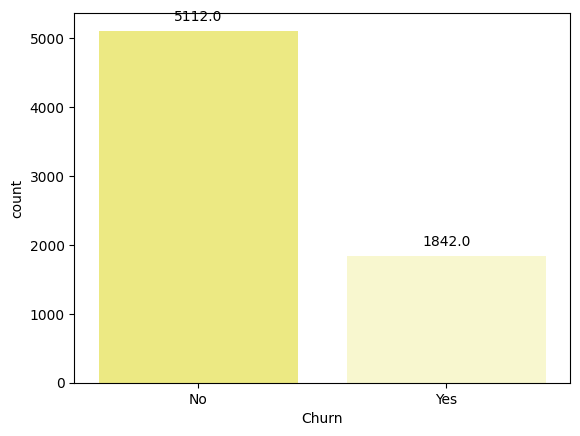

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a countplot with custom colors
ax = sns.countplot(x='Churn', data=data, palette=['#fdfa72', '#fffec8'])

# Annotate the counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

### Prediction Accuracy of Different Models
After comparing between the models, it seems like logistic regression performs better than any other models we have used.

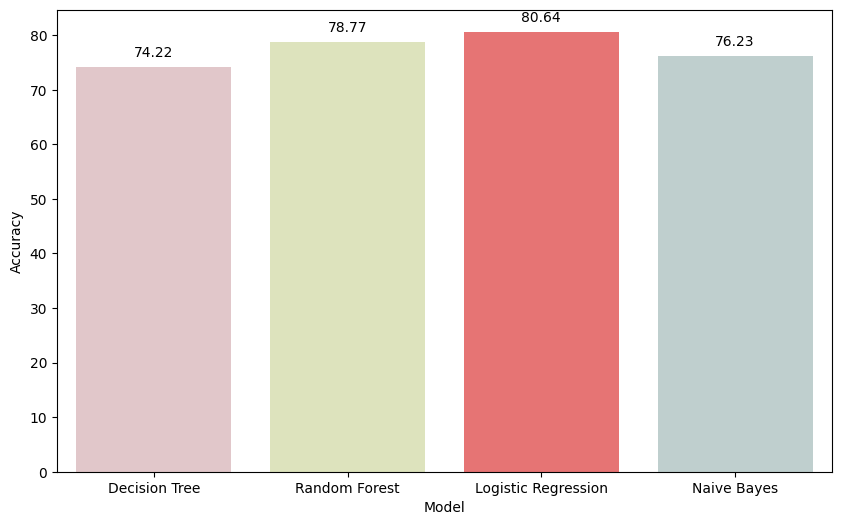

In [ ]:
# Assuming you have calculated the accuracy of each model
accuracy_dict = {
    'Decision Tree': accuracy_using_decision_tree*100,
    'Random Forest': accuracy_using_random_forest*100,
    'Logistic Regression': accuracy_using_logistic_regression*100,
    'Naive Bayes': accuracy_using_gaussian_nb*100
}

# Convert the dictionary to a pandas DataFrame
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=['#e5c3c6', '#e1e9b7', '#f96161', '#bcd2d0'])

# Annotate the accuracy on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()